<a href="https://colab.research.google.com/github/chatterjeerajdeep/explore-machine-learning/blob/main/Try_Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.models import Model,load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt

In [2]:
img_height, img_width = (48,48)

def load_data(train_dir, validate_dir, img_height, img_width):
    datagen = ImageDataGenerator()
    train_it = datagen.flow_from_directory(train_dir,class_mode='categorical', batch_size=32)
    validate_it = datagen.flow_from_directory(validate_dir,class_mode='categorical', batch_size=32)
    label_map = (train_it.class_indices)

    return train_it, validate_it, label_map

In [3]:
train_it, validate_it, label_map = load_data(train_dir="/content/train", validate_dir="/content/test", img_height=img_height, img_width=img_width)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
base_model = ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,3))

In [5]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(7, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [7]:
adam = Adam(lr=0.0001)
cp_callback = ModelCheckpoint(filepath="/content/emotion_detector.h5",monitor='val_accuracy',save_best_only=True, save_weights_only=False, verbose=1)
cp_earlystop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(train_it, validation_data = validate_it,epochs = 30, verbose = 1, callbacks=[cp_callback, cp_earlystop])
model.save("/content/emotion_detector.h5")

Epoch 1/30
898/898 [==============================] - 420s 457ms/step - loss: 2.5782 - accuracy: 0.2057 - val_loss: 2.2008 - val_accuracy: 0.2548

Epoch 00001: val_accuracy improved from -inf to 0.25481, saving model to /content/emotion_detector.h5
Epoch 2/30
898/898 [==============================] - 408s 454ms/step - loss: 1.8947 - accuracy: 0.2546 - val_loss: 2.2254 - val_accuracy: 0.1544

Epoch 00002: val_accuracy did not improve from 0.25481
Epoch 3/30
898/898 [==============================] - 409s 455ms/step - loss: 1.6261 - accuracy: 0.3733 - val_loss: 1.5485 - val_accuracy: 0.4157

Epoch 00003: val_accuracy improved from 0.25481 to 0.41571, saving model to /content/emotion_detector.h5
Epoch 4/30
898/898 [==============================] - 408s 455ms/step - loss: 1.4349 - accuracy: 0.4547 - val_loss: 1.5639 - val_accuracy: 0.4004

Epoch 00004: val_accuracy did not improve from 0.41571
Epoch 5/30
898/898 [==============================] - 408s 455ms/step - loss: 1.2867 - accuracy

{'loss': [2.1990103721618652, 1.8564176559448242, 1.5674312114715576, 1.3957598209381104, 1.2890088558197021, 1.1825127601623535, 1.0825954675674438, 0.9873828291893005, 0.8824878334999084, 0.7579326629638672, 0.609869122505188, 0.4707542657852173, 0.3686681091785431, 0.28512880206108093, 0.2433360069990158, 0.21835820376873016], 'accuracy': [0.22292660176753998, 0.26998502016067505, 0.3995262682437897, 0.4744853675365448, 0.5154132843017578, 0.5576648712158203, 0.5942387580871582, 0.6325542330741882, 0.674910306930542, 0.7211675643920898, 0.7802431583404541, 0.8323870301246643, 0.8674283623695374, 0.9009718298912048, 0.9162980318069458, 0.9240307807922363], 'val_loss': [2.2007675170898438, 2.2253715991973877, 1.5485209226608276, 1.5639466047286987, 1.6551274061203003, 1.5555962324142456, 1.421913743019104, 1.4415141344070435, 1.5118025541305542, 1.3879514932632446, 1.3578965663909912, 1.6465801000595093, 1.7852458953857422, 1.8147274255752563, 1.8099199533462524, 1.9043004512786865], 

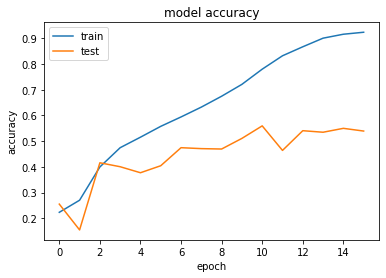

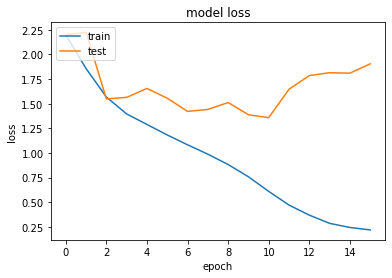

In [13]:
print(model.history.history)
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()